# Solving a Lipkin system

In the following tutorial we will use the fermionic operators in order to solve the Hamiltonian of a Lipkin system. We will find the fundamental state and study some properties.

The system considered will have 2$\Omega$ modes and $\Omega$ particles. It will be structured as 2 levels of energy $k_{+}$ and $k_{-}$. Each level will have $\Omega$ modes $k_{1\pm},k_{2\pm},...,k_{\Omega\pm}$ (picture two parallel rows). We will consider that the occupations of the lower and upper levels of a same index i sum up to 1 ($n_{i-}+n_{i+}=1$). Different modes will interact with through two interaction terms.


After finding this state, we can measure some correlation functions. For more information about this problem, you can refer to [this work](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.100.062104).

In [1]:
using Fermionic
using SparseArrays
using LinearAlgebra
using Plots

## Index:
1. [Find the fundamental state](#fundamental) 
2. [One body entropy](#ssp) (different cases)
4. [Spin mapping](#spin) (faster, but without fermionic operators)
5. [States from spin mapping](#states) (for further studies)

<a id='fundamental'></a>
## Hamiltonian:
The complete Hamiltonian has both a free and an interaction term:

$H = \frac{1}{2}\epsilon\sum_p (c_{p+}^\dagger c_{p+}-c_{p-}^\dagger c_{p-})\\
-W\sum_{p,q}c_{p+}^\dagger c_{q-}^\dagger c_{q+}c_{p-}-\frac{1}{2}V\sum_{p,q}(c_{p+}^\dagger c_{q+}^\dagger c_{q-}c_{p-}+c_{p-}^\dagger c_{q-}^\dagger c_{q+}c_{p+})$

The free term accounts for the two levels + and -. Then there are two interaction terms, a first one that switches crossed modes $i+$ and $j-$ with $i-$ and $j+$, and a second one that switches paralell modes $i+$ and $j+$ with $i-$ and $j-$.

In [2]:
d = 6 #este va a ser un sistema de 4 niveles
o = Op(d);

e0 = 1.0
w = 1.0
v = 1.0
epsilon = [-e0/2 for i in 1:d/2];
epsilon = [epsilon; -epsilon]
h0 = sum([epsilon[i]*cdm(o,i)*cm(o,i) for i in 1:(Int(d))]);
hw = sum([sum([if i==j spzeros(2^d, 2^d) else cdm(o,Int(i+d/2))*cdm(o,j)*cm(o,Int(j+d/2))*cm(o,i) end
                    for i in 1:Int(d/2)]) for j in 1:Int(d/2)])
hv = sum([sum([if i==j spzeros(2^d, 2^d) else (1/2)*(cdm(o,Int(i+d/2))*cdm(o,Int(j+d/2))*cm(o,j)*cm(o,i) 
                        + cdm(o,i)*cdm(o,j)*cm(o,Int(j+d/2))*cm(o,Int(i+d/2))) end
                    for i in 1:Int(d/2)]) for j in 1:Int(d/2)])

h = h0 - w*hw - v*hv

fundamental = eigvecs(Matrix(h))[:,1]
fund = State(fundamental,o);

In [3]:
eigensp(fund)

6-element Array{Float64,1}:
 0.333333333333334
 0.333333333333334
 0.333333333333334
 0.666666666666666
 0.666666666666666
 0.666666666666666

Notice we have not set the number of particles, but the fundamental state between all possible occupations has exactly half the occupation.

In [4]:
sum(eigensp(fund))

3.0

<a id='ssp'></a>
### One body entropy as a function of interaction

We consider now $\chi = \frac{W-V}{W+V}$ to evaluate different cases.

$\chi = 1 \rightarrow V = 0\\
\chi = 0 \rightarrow V=W\\
\chi = 0.5 \rightarrow V=W/3$

### $\chi = 1$:

In [5]:
#chi = 1
d = 8
o = Op(d);

e0 = 1.0
v = 0.0
wmin = 0.0
wmax = 6.0
step = 0.01

epsilon = [-e0/2 for i in 1:d/2];
epsilon = [epsilon; -epsilon]
h0 = sum([epsilon[i]*cdm(o,i)*cm(o,i) for i in 1:(Int(d))]);
hw = sum([sum([if i==j spzeros(2^d, 2^d) else cdm(o,Int(i+d/2))*cdm(o,j)*cm(o,Int(j+d/2))*cm(o,i) end
                    for i in 1:Int(d/2)]) for j in 1:Int(d/2)])

wi = zeros(0)
entropy = zeros(0)

for k in wmin:step:wmax
    append!(wi,round(k, digits=10))    
    h = h0 - round(k, digits=10)*hw
    fundamental = eigvecs(Matrix(h))[:,1]
    fund = State(fundamental,o);
    append!(entropy,ssp(fund))
    #print(round(gmin+k, digits=10))
end


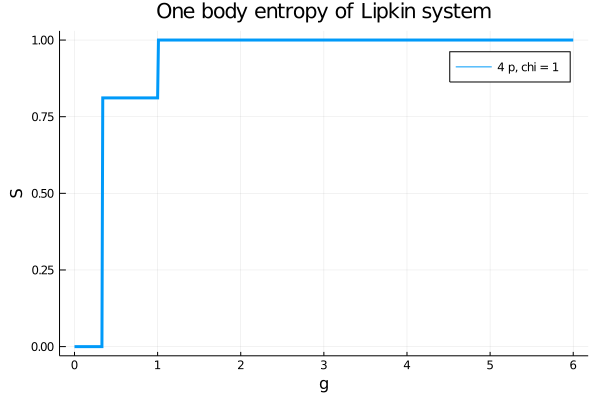

In [6]:
plot(wi, entropy, title = "One body entropy of Lipkin system", label = "4 p, chi = 1", lw = 3, xlabel = "g", ylabel = "S")

### $\chi = 0$:

In [7]:
#chi = 0
d = 8
o = Op(d);

e0 = 1.0
wmin = 0.0
wmax = 6.0
step = 0.01

epsilon = [-e0/2 for i in 1:d/2];
epsilon = [epsilon; -epsilon]
h0 = sum([epsilon[i]*cdm(o,i)*cm(o,i) for i in 1:(Int(d))]);
hw = sum([sum([if i==j spzeros(2^d, 2^d) else cdm(o,Int(i+d/2))*cdm(o,j)*cm(o,Int(j+d/2))*cm(o,i) end
                    for i in 1:Int(d/2)]) for j in 1:Int(d/2)])
hv = sum([sum([if i==j spzeros(2^d, 2^d) else (1/2)*(cdm(o,Int(i+d/2))*cdm(o,Int(j+d/2))*cm(o,j)*cm(o,i) 
                        + cdm(o,i)*cdm(o,j)*cm(o,Int(j+d/2))*cm(o,Int(i+d/2))) end
                    for i in 1:Int(d/2)]) for j in 1:Int(d/2)])

wi = zeros(0)
entropy = zeros(0)

for k in wmin:step:wmax
    append!(wi,round(k, digits=10))    
    h = h0 - round(k, digits=10)*hw - round(wmin+k, digits=10)*hv
    fundamental = eigvecs(Matrix(h))[:,1]
    fund = State(fundamental,o);
    append!(entropy,ssp(fund))
    #print(round(gmin+k, digits=10))
end


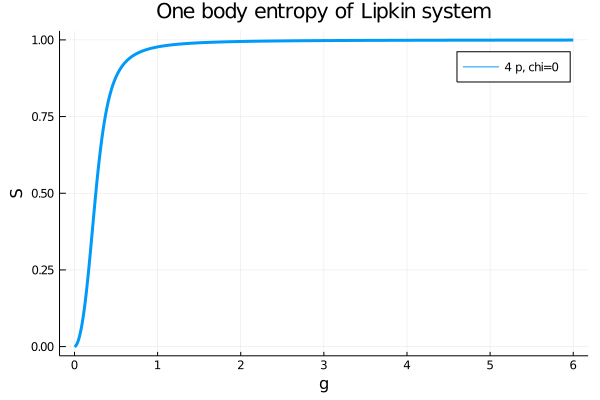

In [8]:
plot(wi, entropy, title = "One body entropy of Lipkin system", label = "4 p, chi=0", lw = 3, xlabel = "g", ylabel = "S")

### $\chi = 0.5$:

In [9]:
#chi = 0.5
d = 8
o = Op(d);

e0 = 1.0
wmin = 0.0
wmax = 6.0
step = 0.01

epsilon = [-e0/2 for i in 1:d/2];
epsilon = [epsilon; -epsilon]
h0 = sum([epsilon[i]*cdm(o,i)*cm(o,i) for i in 1:(Int(d))]);
hw = sum([sum([if i==j spzeros(2^d, 2^d) else cdm(o,Int(i+d/2))*cdm(o,j)*cm(o,Int(j+d/2))*cm(o,i) end
                    for i in 1:Int(d/2)]) for j in 1:Int(d/2)])
hv = sum([sum([if i==j spzeros(2^d, 2^d) else (1/2)*(cdm(o,Int(i+d/2))*cdm(o,Int(j+d/2))*cm(o,j)*cm(o,i) 
                        + cdm(o,i)*cdm(o,j)*cm(o,Int(j+d/2))*cm(o,Int(i+d/2))) end
                    for i in 1:Int(d/2)]) for j in 1:Int(d/2)])

wi = zeros(0)
entropy = zeros(0)

for k in wmin:step:wmax
    append!(wi,round(k, digits=10))    
    h = h0 - round(k, digits=10)*hw - (1/3)*round(wmin+k, digits=10)*hv
    fundamental = eigvecs(Matrix(h))[:,1]
    fund = State(fundamental,o);
    append!(entropy,ssp(fund))
    #print(round(gmin+k, digits=10))
end


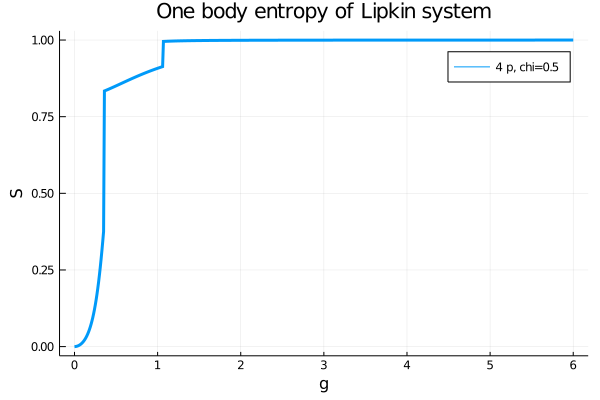

In [10]:
plot(wi, entropy, title = "One body entropy of Lipkin system", label = "4 p, chi=0.5", lw = 3, xlabel = "g", ylabel = "S")

<a id='spin'></a>
### Using symmetries

Because of the condition $n_{i-}+n_{i+}=1$, we can map this system exactly to a spin system.

$S_\pm = S_x \pm i S_y = \sum_p c_{p\pm}^\dagger c_{p\mp}\\
S_z = \frac{1}{2}\sum_p(c_{p+}^\dagger c_{p+} - c_{p-}^\dagger c_{p-}) $

Replacing this in the Hamiltonian, we get to

$H = \epsilon S_z - \frac{W}{2}(S_+S_- + S_-S_+-N) - \frac{V}{2}(S_+^2+S_-^2)\\
=\epsilon S_z - V_x(S_+^2+\chi S_-^2) - V_x\frac{1+\chi}{4}N$

$V_x = W+V,\quad
\chi = \frac{W-V}{W+V}$

$V_x = v_x/ (\Omega - 1)$

Now we can solve the system faster.

In [11]:
n = 4
s = n/2
d = Int(2s + 1); #matrices de spin son de dxd

sp = spzeros(d, d)
sz = spzeros(d, d)
sz[d,d] = s
for i in 1:(d-1)
    m = -s + i - 1
    global sp[i+1,i] = sqrt((s - m)*(s + m + 1))
    global sz[i,i] = m
end

sm = sp'
sx = (sp + sm)/2
sy = (sp - sm)/(2im);

sz2 = sz^2
sp2 = sp^2
sm2 = sm^2
spm = sp*sm
smp = sm*sp;

function prog(fund)
    sz_avg = fund'*sz*fund/n
    sz2_avg = (fund'*sz2*fund-n/4)/(n*(n-1))
    sp2_avg = fund'*sp2*fund/(n*(n-1))
    sppm_avg = fund'*(spm+smp)*fund/(2*n*(n-1))
    fp = sz_avg + 1/2
    fm = 1 - fp
    if fp != 0 && fp != 1
        sob = -(fp*log(2,fp) + fm*log(2,fm))
    else
        sob = 0  
    end
    return sob
end

#vp = (vx - vy)/4
#vm = (vx + vy)/4
vp = 1.0
vm = 1.0

h = sz - (vp/(n-1))*(sp2 + sm2) - (vm/(n-1))*(spm + smp - n*I)
fund = eigvecs(Matrix(h))[:,1]
prog(fund)

0.9409948014546419

### $\chi = 1$

In [12]:
#chi = 1
n = 8
s = n/2
d = Int(2s + 1); #matrices de spin son de dxd

sp = spzeros(d, d)
sz = spzeros(d, d)
sz[d,d] = s
for i in 1:(d-1)
    m = -s + i - 1
    global sp[i+1,i] = sqrt((s - m)*(s + m + 1))
    global sz[i,i] = m
end

sm = sp'
sx = (sp + sm)/2
sy = (sp - sm)/(2im);

sz2 = sz^2
sp2 = sp^2
sm2 = sm^2
spm = sp*sm
smp = sm*sp;

function prog(fund)
    sz_avg = fund'*sz*fund/n
    sz2_avg = (fund'*sz2*fund-n/4)/(n*(n-1))
    sp2_avg = fund'*sp2*fund/(n*(n-1))
    sppm_avg = fund'*(spm+smp)*fund/(2*n*(n-1))
    fp = sz_avg + 1/2
    fm = 1 - fp
    if fp != 0 && fp != 1
        sob = -(fp*log(2,fp) + fm*log(2,fm))
    else
        sob = 0  
    end
    return round(sob, digits = 10)
end

vxmin = 0.0
vxmax = 5.0
step = 0.01

vx = zeros(0)
entropy = zeros(0)
chi = 1

for k in vxmin:step:vxmax
    vxx = round(k, digits=10)
    append!(vx,vxx)
    vy = round(chi*vxx,digits=10)
    vp = (vxx - vy)/4
    vm = (vxx + vy)/4

    h = sz - (vp/(n-1))*(sp2 + sm2) - (vm/(n-1))*(spm + smp - n*I)
    fund = eigvecs(Matrix(h))[:,1]
    append!(entropy, prog(fund))
end

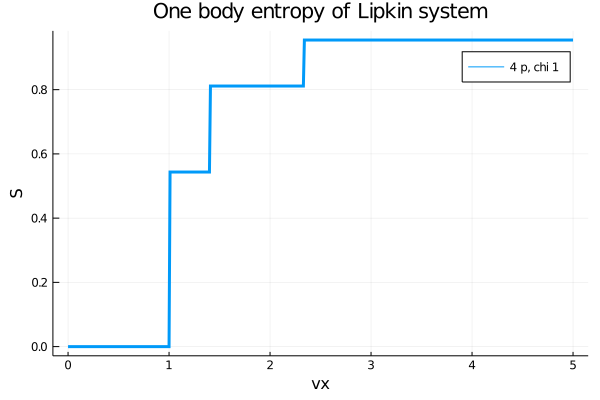

In [13]:
plot(vx, entropy, title = "One body entropy of Lipkin system", label = "4 p, chi 1", lw = 3, xlabel = "vx", ylabel = "S")

### $\chi = 0$

In [14]:
#chi = 0
n = 8
s = n/2
d = Int(2s + 1); #matrices de spin son de dxd

sp = spzeros(d, d)
sz = spzeros(d, d)
sz[d,d] = s
for i in 1:(d-1)
    m = -s + i - 1
    global sp[i+1,i] = sqrt((s - m)*(s + m + 1))
    global sz[i,i] = m
end

sm = sp'
sx = (sp + sm)/2
sy = (sp - sm)/(2im);

sz2 = sz^2
sp2 = sp^2
sm2 = sm^2
spm = sp*sm
smp = sm*sp;

function prog(fund)
    sz_avg = fund'*sz*fund/n
    sz2_avg = (fund'*sz2*fund-n/4)/(n*(n-1))
    sp2_avg = fund'*sp2*fund/(n*(n-1))
    sppm_avg = fund'*(spm+smp)*fund/(2*n*(n-1))
    fp = sz_avg + 1/2
    fm = 1 - fp
    if fp != 0 && fp != 1
        sob = -(fp*log(2,fp) + fm*log(2,fm))
    else
        sob = 0  
    end
    return round(sob, digits = 10)
end

vxmin = 0.0
vxmax = 5.0
step = 0.01

vx = zeros(0)
entropy = zeros(0)
chi = 0

for k in vxmin:step:vxmax
    vxx = round(k, digits=10)
    append!(vx,vxx)
    vy = round(chi*vxx,digits=10)
    vp = (vxx - vy)/4
    vm = (vxx + vy)/4

    h = sz - (vp/(n-1))*(sp2 + sm2) - (vm/(n-1))*(spm + smp - n*I)
    fund = eigvecs(Matrix(h))[:,1]
    append!(entropy, prog(fund))
end

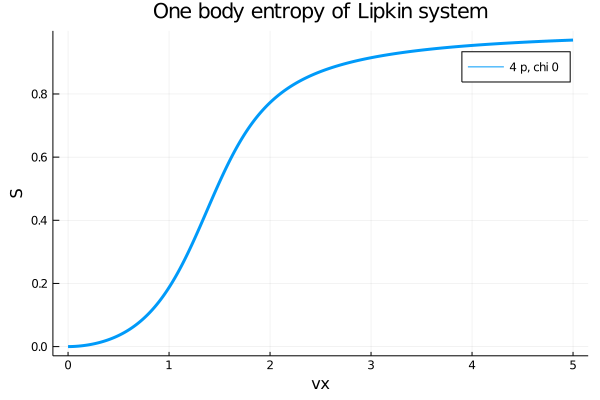

In [15]:
plot(vx, entropy, title = "One body entropy of Lipkin system", label = "4 p, chi 0", lw = 3, xlabel = "vx", ylabel = "S")

### $\chi = 0.5$

In [16]:
#chi = 0
n = 8
s = n/2
d = Int(2s + 1); #matrices de spin son de dxd

sp = spzeros(d, d)
sz = spzeros(d, d)
sz[d,d] = s
for i in 1:(d-1)
    m = -s + i - 1
    global sp[i+1,i] = sqrt((s - m)*(s + m + 1))
    global sz[i,i] = m
end

sm = sp'
sx = (sp + sm)/2
sy = (sp - sm)/(2im);

sz2 = sz^2
sp2 = sp^2
sm2 = sm^2
spm = sp*sm
smp = sm*sp;

function prog(fund)
    sz_avg = fund'*sz*fund/n
    sz2_avg = (fund'*sz2*fund-n/4)/(n*(n-1))
    sp2_avg = fund'*sp2*fund/(n*(n-1))
    sppm_avg = fund'*(spm+smp)*fund/(2*n*(n-1))
    fp = sz_avg + 1/2
    fm = 1 - fp
    if fp != 0 && fp != 1
        sob = -(fp*log(2,fp) + fm*log(2,fm))
    else
        sob = 0  
    end
    return round(sob, digits = 10)
end

vxmin = 0.0
vxmax = 5.0
step = 0.01

vx = zeros(0)
entropy = zeros(0)
chi = 0.5

for k in vxmin:step:vxmax
    vxx = round(k, digits=10)
    append!(vx,vxx)
    vy = round(chi*vxx,digits=10)
    vp = (vxx - vy)/4
    vm = (vxx + vy)/4

    h = sz - (vp/(n-1))*(sp2 + sm2) - (vm/(n-1))*(spm + smp - n*I)
    fund = eigvecs(Matrix(h))[:,1]
    append!(entropy, prog(fund))
end

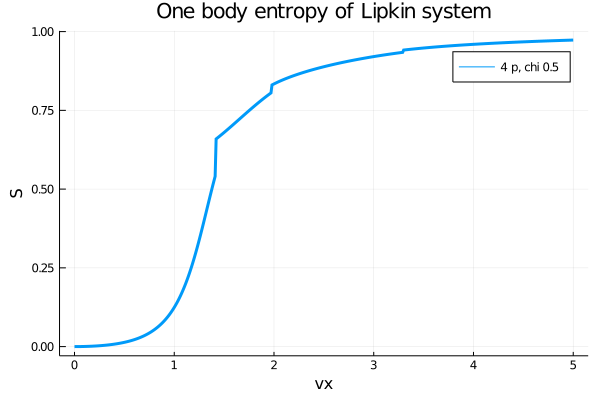

In [17]:
plot(vx, entropy, title = "One body entropy of Lipkin system", label = "4 p, chi 0.5", lw = 3, xlabel = "vx", ylabel = "S")

<a id='states'></a>
## States using symmetries

In the previous section, we found out the ground state written in the basis of $S_z$. With this information we can recover the original state with the occupancies of each individual level.

In [18]:
n = 8
s = n/2
d = Int(2s + 1); #matrices de spin son de dxd

sp = spzeros(d, d)
sz = spzeros(d, d)
sz[d,d] = s
for i in 1:(d-1)
    m = -s + i - 1
    global sp[i+1,i] = sqrt((s - m)*(s + m + 1))
    global sz[i,i] = m
end

sm = sp'
sx = (sp + sm)/2
sy = (sp - sm)/(2im);

sz2 = sz^2
sp2 = sp^2
sm2 = sm^2
spm = sp*sm
smp = sm*sp;

#vp = (vx - vy)/4
#vm = (vx + vy)/4
vp = 1.0
vm = 1.0

h = sz - (vp/(n-1))*(sp2 + sm2) - (vm/(n-1))*(spm + smp - n*I)
fund = eigvecs(Matrix(h))[:,1]

o = Op(n)
baso = basis(o)

m = Int(n/2)
basm = spzeros(2^m,n)
counter = 1
pos = spzeros(2^m)

for i in 1:2^n
    if sum(baso[i,:]) == m        
        if sum([baso[i,j]!=baso[i,Int(j+n/2)] for j in 1:Int(n/2)]) == Int(n/2)  
            basm[counter,:] = baso[i,:]
            pos[counter] = i
            counter = counter + 1
        end    
    end
end


state = spzeros(2^n);
for i in 1:2^m
    st = sum(basm[i,1:Int(n/2)])
    if st%2 == 0
        state[Int(pos[i])] = round(fund[d-2*Int(st)], digits = 15)
    end
end

state = state/sqrt(state'*state) #normalization

state = State_sparse(state,o);

In [19]:
ssp(state)

0.9997062643892284